In [6]:
import numpy as np

In [2]:
# Person has N strains, each strain has a specific infectiousness. Assuming mosquito WILL get infected by biting this person, which strains will it pick up?

In [16]:
# Person has 3 strains, each with a different infectiousness
infectiousness = np.array([0.1, 0.03,0.01])

In [69]:
def simulate_bites(prob_transmit, vector_strain_pickup_mode):
    if vector_strain_pickup_mode == "all":
        return [True for _ in prob_transmit]
    
    if vector_strain_pickup_mode == "rescale":
        at_least_one_transmits = 1 - np.prod(1 - prob_transmit)
        prob_transmit = prob_transmit / at_least_one_transmits
    else:
        pass
    n_strains = len(prob_transmit)

    while True:
        successes = np.random.rand(n_strains) < prob_transmit
        if np.any(successes):
            return successes
        
def single_oocyst_formation(successes, infectiousness):
    # Sample from the successes, based on infectiousness
    choices = np.arange(len(successes))[successes]
    p = infectiousness[successes] / np.sum(infectiousness[successes])
    
    # Sample from the choices
    return np.random.choice(choices, size=2, replace=True, p=p)

def which_strains_contribute_to_oocyst_formation(prob_transmit, vector_strain_pickup_mode):
    successes = simulate_bites(prob_transmit, vector_strain_pickup_mode)
    return single_oocyst_formation(successes, infectiousness)

In [9]:
from functools import partial

# Probability of picking up each strain
s1 = partial(simulate_bites, vector_strain_pickup_mode="rescale")
s2 = partial(simulate_bites, vector_strain_pickup_mode="no_rescale")

In [19]:
N = 1000
n_picked_up1 = np.empty(N)
n_picked_up2 = np.empty(N)
for i in range(1000):
    n_picked_up1[i] = np.sum(s1(infectiousness))
    n_picked_up2[i] = np.sum(s2(infectiousness))

<Axes: ylabel='count'>

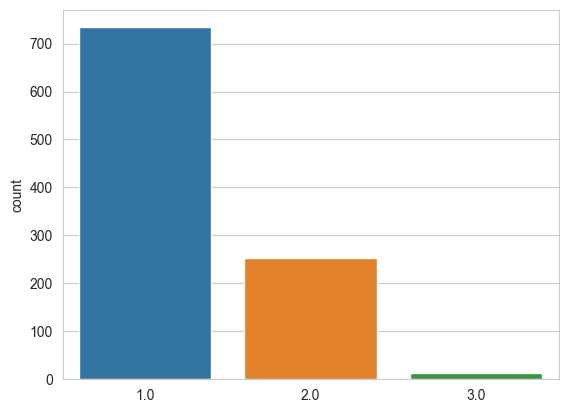

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.countplot(x=n_picked_up1)
# plt.hist(n_picked_up1, bins=range(4), histtype="step")
# plt.hist(n_picked_up2, bins=range(4), histtype="step")

<Axes: ylabel='count'>

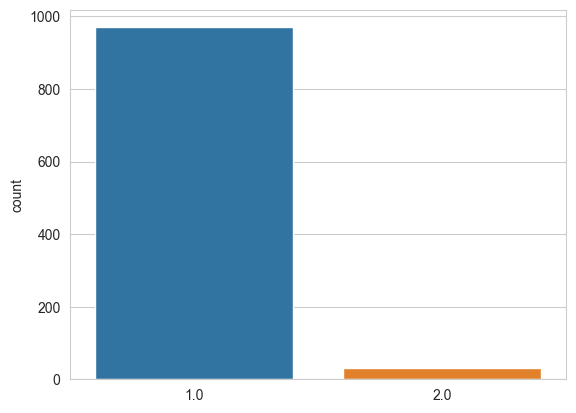

In [31]:
sns.countplot(x=n_picked_up2)

In [28]:
# Create a combined dataset with labels
data1 = n_picked_up1
data2 = n_picked_up2

combined_data = data1 + data2
labels = ['Dataset 1'] * len(data1) + ['Dataset 2'] * len(data2)

# Create a barplot with both datasets
sns.countplot(x=combined_data, hue=labels)
plt.title('Histogram of Integers from 1 to 3 for Two Datasets')
plt.xlabel('Integer')
plt.ylabel('Frequency')
plt.legend(title='Dataset')
plt.show()

ValueError: Grouper and axis must be same length

In [51]:
single_oocyst_formation(np.array([1, 0, 1]), infectiousness)

array([0, 0])

Likelihood of recombination:  0.368


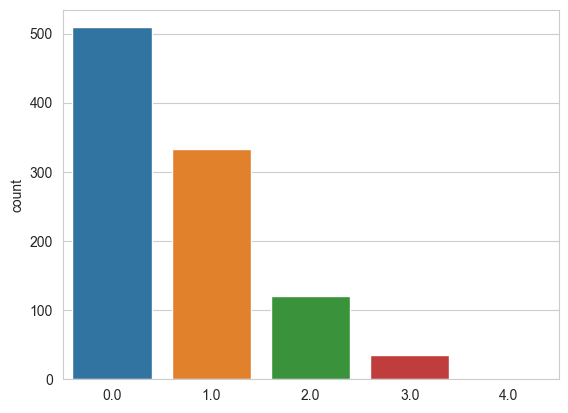

In [71]:
foo = np.empty(1000)
for i in np.arange(1000):
    s = which_strains_contribute_to_oocyst_formation(np.array([0.1, 0.03, 0.01]), "all")
    foo[i] = np.sum(s)
sns.countplot(x=foo)
# likelihood of recombination
print("Likelihood of recombination: ", (np.sum(foo == 1) + np.sum(foo==3)) / 1000)

Likelihood of recombination:  0.086


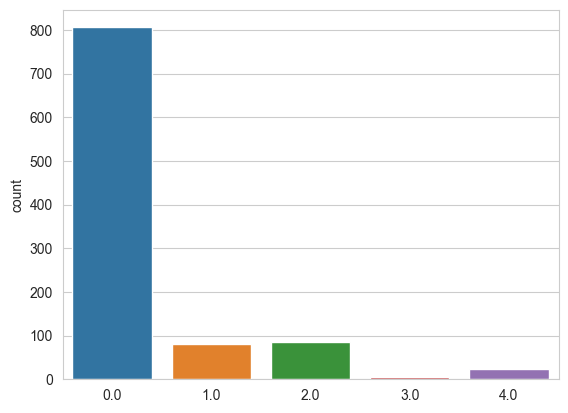

In [68]:
foo = np.empty(1000)
for i in np.arange(1000):
    s = which_strains_contribute_to_oocyst_formation(np.array([0.1, 0.03, 0.01]), "rescale")
    foo[i] = np.sum(s)
sns.countplot(x=foo)
# likelihood of recombination
print("Likelihood of recombination: ", (np.sum(foo == 1) + np.sum(foo==3)) / 1000)

Likelihood of recombination:  0.01


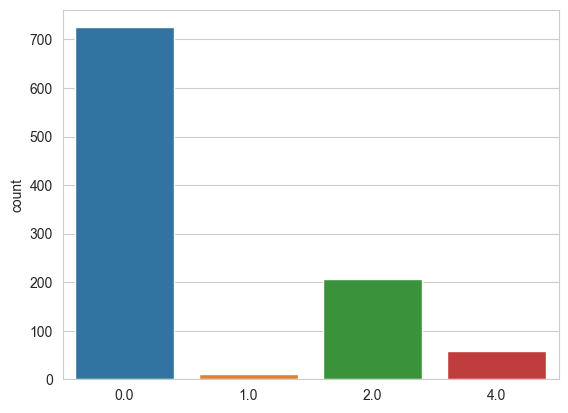

In [67]:
foo = np.empty(1000)
for i in np.arange(1000):
    s = which_strains_contribute_to_oocyst_formation(np.array([0.1, 0.03, 0.01]), "no_rescale")
    foo[i] = np.sum(s)
sns.countplot(x=foo)
print("Likelihood of recombination: ", (np.sum(foo == 1) + np.sum(foo==3)) / 1000)